# 多分类问题

## 多分类问题思路
昨天涉及到logistic回归做分类其实只是二分类问题，但是如果遇到多分类学习任务该怎么办呢？要想实现多个类别的分类，我们必须要改进logistic回归，让其适应多分类问题。关于这种改进，有两种方式可以做到：

1. 第一种方式**拆解法**是直接根据每个类别，都建立一个二分类器，带有这个类别的样本标记为1，带有其他类别的样本标记为0。假如我们有个类别，最后我们就得到了个针对不同标记的普通的logistic分类器。

1. 第二种方式是**修改**logistic回归的**损失函数**，让其适应多分类问题。这个损失函数不再笼统地只考虑二分类非1就0的损失，而是具体考虑每个样本标记的损失。这种方法叫做softmax回归，即logistic回归的多分类版本。

## softmax回归
softmax算法思路：[Softmax回归](https://blog.csdn.net/howardact/article/details/54581901)（推荐！讲的很清楚详细！）


![](./img/1.PNG)

![](./img/2.PNG)
![](./img/3.PNG)
![](./img/4.PNG)

* Softmax Regression代码[Softmax Regression代码](https://blog.csdn.net/m0_37430356/article/details/77948882)

In [40]:
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
%matplotlib inline

In [41]:
#导入数据  
data=pd.read_table('./data/multiclass.txt',sep='\t')  
x=data.iloc[:,0] #特征向量一  
y=data.iloc[:,1] #特征向量二  
label=data.iloc[:,2] #标识 
print(data[:5])

   -0.017612  14.053064  2
0  -1.395634   4.662541  3
1  -0.752157   6.538620  3
2  -1.322371   7.152853  3
3   0.423363  11.054677  2
4   0.406704   7.067335  3


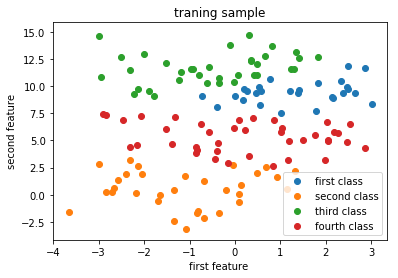

In [42]:
#%%画图  
plt.figure('training sample')  
plt.scatter(x[label==0],y[label==0],label='first class')  
plt.scatter(x[label==1],y[label==1],label='second class')  
plt.scatter(x[label==2],y[label==2],label='third class')  
plt.scatter(x[label==3],y[label==3],label='fourth class')  
plt.xlabel('first feature ')  
plt.ylabel('second feature')  
plt.legend()  
plt.title('traning sample')  
plt.show()

In [43]:
#%% 调整参数  
feature=np.mat((x,y)).T  
label=np.mat(label).T  
#print(feature)  
print(type(feature))  
print(np.shape(feature))

<class 'numpy.matrixlib.defmatrix.matrix'>
(134, 2)


* 最好自己先看看公式想想怎么用程序写出来

In [44]:
#%% 梯度更新函数  
def gradientAscent(feature,label_data,k,maxCycle,alpha):
#input: feature_data(mat):特征  
#     label_data(mat):标签  
#     k(int):类别的个数  
#     maxCycle(int):最大迭代次数  
#     alpha(float):学习率  
#     m(int)样本个数  
#     n(int)变量特征  
#output: weights(mat):权重,costs:损失函数值，itter:迭代次数
    costs=[]
    itter=[]
    feature_data=np.column_stack((feature,np.ones(np.shape(feature)[0]))) #feature（n+1，在这里是3）
    m=np.shape(feature_data)[0]  
    n=np.shape(feature_data)[1]  
    weights=np.mat(np.ones((n,k)))  
    i=0  
    while i<=maxCycle:
        err=np.exp(feature_data*weights)  
        if i%100==0:  
            itter.append(i)
            costs.append(cost(err,label_data))                
        rowsum=-err.sum(axis=1)  
        rowsum=rowsum.repeat(k,axis=1)  
        err=err/rowsum  
        for x in range(m):  
             err[x,label_data[x,0]]+=1  
        weights=weights+(alpha/m)*feature_data.T*err  
        i=i+1  
    return weights,itter,costs 
  
#%% 计算损失值函数  
def cost(err,label_data):  
    # input: err(mat):exp的值  
     #          label_data:标签的值  
      #  output: sum_cost/ m(float):损失函数的值  
      
    m=np.shape(err)[0]  
    sum_cost=0.0  
    for i in range(m):  
        if err[i,label_data[i,0]]/np.sum(err[i,:])>0:  
            sum_cost -= np.log(err[i,label_data[i,0]]/np.sum(err[i,:]))  
        else:  
            sum_cost -=0  
    return sum_cost/m  

In [45]:
#%% 训练模型  
w,itter,costs=gradientAscent(feature,label,4,50000,0.2)  
  
#%% 输出权重  
print('权重为：',w) 

权重为： [[  2.51420905   0.10831969  -0.28658063   1.66405189]
 [  2.96971529  -5.00329153   5.89620249   0.13737375]
 [ -6.20706538  30.09845399 -35.51447943  15.62309082]]


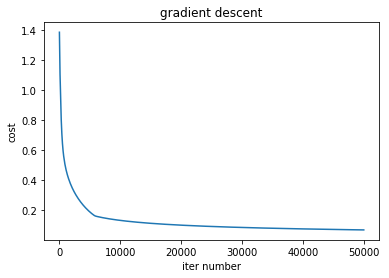

In [46]:
plt.plot(itter,costs)
plt.xlabel("iter number")
plt.ylabel('cost')
plt.title("gradient descent")
plt.show()

In [48]:
#%% 生成预测样本  
xx=(np.random.random(10000)-0.5)*6  
yy=(np.random.random(10000))*15  
b=np.ones(10000)  
print(np.shape(np.mat((xx,yy,b)).T))  
test=np.mat((xx,yy,b)).T  
re=test*w  
predict=re.argmax(axis=1)#numpy.argmax(a, axis=None, out=None)返回沿轴axis最大值的索引。

(10000, 3)


[[14.85774758]
 [ 8.97191001]
 [ 6.29339917]
 ...
 [ 6.66068594]
 [ 8.04608244]
 [14.88262883]]


Text(0.5,1,'test sample')

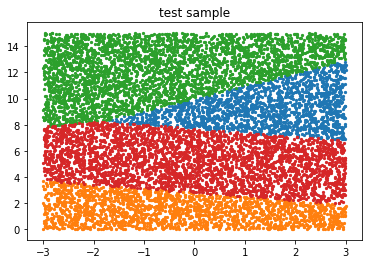

In [50]:
plt.figure('test sample')  
print(np.column_stack((test,predict))[:,1])  
merge=pd.DataFrame(np.column_stack((test,predict)))  
plt.scatter(merge[merge.iloc[:,3]==0].iloc[:,0],merge[merge.iloc[:,3]==0].iloc[:,1],5)  
plt.scatter(merge[merge.iloc[:,3]==1].iloc[:,0],merge[merge.iloc[:,3]==1].iloc[:,1],5)  
plt.scatter(merge[merge.iloc[:,3]==2].iloc[:,0],merge[merge.iloc[:,3]==2].iloc[:,1],5)  
plt.scatter(merge[merge.iloc[:,3]==3].iloc[:,0],merge[merge.iloc[:,3]==3].iloc[:,1],5)  
plt.title('test sample') 

## softmax与logistic回归的对比
[softmax回归](http://deeplearning.stanford.edu/wiki/index.php/Softmax%E5%9B%9E%E5%BD%92)

如果你在开发一个音乐分类的应用，需要对k种类型的音乐进行识别，那么是选择使用 softmax 分类器呢，还是使用 logistic 回归算法建立 k 个独立的二元分类器呢？

这一选择取决于你的类别之间是否**互斥**，例如，如果你有四个类别的音乐，分别为：古典音乐、乡村音乐、摇滚乐和爵士乐，那么你可以假设每个训练样本只会被打上一个标签（即：一首歌只能属于这四种音乐类型的其中一种），此时你应该使用类别数 k = 4 的softmax回归。（如果在你的数据集中，有的歌曲不属于以上四类的其中任何一类，那么你可以添加一个“其他类”，并将类别数 k 设为5。）

如果你的四个类别如下：人声音乐、舞曲、影视原声、流行歌曲，那么这些类别之间并不是互斥的。例如：一首歌曲可以来源于影视原声，同时也包含人声 。这种情况下，使用4个二分类的 logistic 回归分类器更为合适。这样，对于每个新的音乐作品 ，我们的算法可以分别判断它是否属于各个类别。

现在我们来看一个计算视觉领域的例子，你的任务是将图像分到三个不同类别中。(i) 假设这三个类别分别是：室内场景、户外城区场景、户外荒野场景。你会使用sofmax回归还是 3个logistic 回归分类器呢？ (ii) 现在假设这三个类别分别是室内场景、黑白图片、包含人物的图片，你又会选择 softmax 回归还是多个 logistic 回归分类器呢？
在第一个例子中，三个类别是互斥的，因此更适于选择softmax回归分类器 。而在第二个例子中，建立三个独立的 logistic回归分类器更加合适。

# 类别不平衡问题

[分类中常见的类别不平衡问题解决方法 - CSDN博客](https://blog.csdn.net/u013829973/article/details/77675147?fps=1&locationNum=4)

* 通常的分类学习方法中都有一个共同的假设，即不同类别的训练样例数目相同。如果不同类别的训练样例数目稍有差别，通常对分类影响不大，但是若差别很大，则会对学习造成影响，测试结果非常差。例如二分类问题中有998个反例，正例有2个，那么学习方法只需返回一个永远将新样本预测为反例的分类器，就能达到99.8%的精度；然而这样的分类器没有价值，我们必须要解决这个问题。

##  解决方法：
1. 扩大数据集
1. 上采样（也叫过采样）（不断在少的部分采样使其和多的一样多）代表算法是SMOTE和ADASYN。**SMOTE**：通过对训练集中的小类数据进行插值来产生额外的小类样本数据。**ADASYN**：基本思想是根据学习难度的不同，对不同的少数类别的样本使用加权分布，比较容易学习的少数类样本，对于难以学习的少数类的样本，产生更多的综合数据。
1. 下采样（也叫欠采样）（让多的和少的一样多)代表算法**EasyEnsemble**：利用集成学习机制，将大类划分为若干个集合供不同的学习器使用。这样对每个学习器来看都进行了下采样，但在全局来看却不会丢失重要信息。

<font color=Red size=4 >这里使用一个信用卡欺诈问题的处理来学习类别不平衡问题和第三节的一些新指标</font>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [80]:
data = pd.read_csv("./data/creditcard.csv")
data.head()
#数据已经被脱敏处理了

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


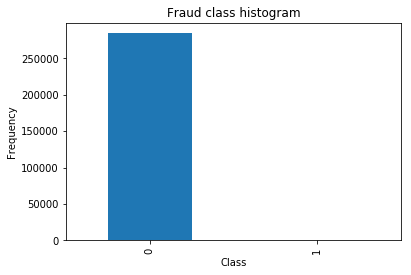

In [81]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## 数据预处理

[python进行机器学习（一）之数据预处理
](https://www.cnblogs.com/gczr/p/6761613.html)

## 常常搞混的：[归一化、标准化和正则化](https://zhuanlan.zhihu.com/p/29957294)

1. 归一化:归一化一般是将数据映射到指定的范围，用于去除不同维度数据的量纲以及量纲单位。常见的映射范围有 [0, 1] 和 [-1, 1] 
1. 标准化：最常见的标准化方法： Z-Score 标准化。（$x_{new}=\frac{x-u}{\sigma}$）
1. 正则化：正则化主要用于避免过拟合的产生和减少网络误差。

In [82]:
#针对某些特征相当，去量纲，对特征进行标准化
from sklearn.preprocessing import StandardScaler#针对数据预处理，标准化
#为Amount变量去量纲，标准化
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 下采样（一样少）

In [83]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset（下采样后的数据集）
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


## 交叉验证（求稳操作）
- 分割训练集和测试集
- [模型评估与度量](https://www.cnblogs.com/kuotian/p/6151541.html)

In [84]:
from sklearn.model_selection import train_test_split
# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset（下采样）
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                              ,y_undersample                                                                                                  ,test_size = 0.3
                                                                                                   ,random_state = 0)
#由于下采样数据集的个数可能太少，并且不具备原数据的特点，因此需要测试通过原数据集的test的集来测试   
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [85]:
#Recall = TP/(TP+FN)（查全率）（在所有预测的正例中，真正为正例的比例）
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

In [94]:
#K折交叉验证
def printing_Kfold_scores(x_train_data,y_train_data):
    
    fold = KFold(len(y_train_data),5,shuffle=False) 
    #正则化惩罚项
    # Different C parameters
    c_param_range = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_param, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table
    best_c.dtypes.eq(object) # you can see the type of best_c
    new = best_c.columns[best_c.dtypes.eq(object)] #get the object column of the best_c
    best_c[new] = best_c[new].apply(pd.to_numeric, errors = 'coerce', axis=0) # change the type of object
    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter'] #calculate the mean values
    return best_c

In [95]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)#训练数据分了5份，所以训练了5次
print(type(best_c))

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.958904109589041
Iteration  2 : recall score =  0.9178082191780822
Iteration  3 : recall score =  1.0
Iteration  4 : recall score =  0.972972972972973
Iteration  5 : recall score =  0.9545454545454546

Mean recall score  0.96084615125711

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8493150684931506
Iteration  2 : recall score =  0.863013698630137
Iteration  3 : recall score =  0.9322033898305084
Iteration  4 : recall score =  0.9459459459459459
Iteration  5 : recall score =  0.8939393939393939

Mean recall score  0.8968834993678272

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8356164383561644
Iteration  2 : recall score =  0.8767123287671232
Iteration  3 : recal

In [96]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 使用新的评价指标
还是最前面的例子，二分类问题中有998个反例，正例有2个，那么学习方法只需返回一个永远将新样本预测为反例的分类器，就能达到99.8%的精度；然而这样的分类器没有价值，我们必须要解决这个问题。准确度这个评价指标在类别不均衡的分类任务中并不适用，甚至进行误导。因此在类别不均衡分类任务中，需要使用更有说服力的评价指标来对分类器进行评价。 
1. 混淆矩阵(Confusion Matrix)：使用一个表格对分类器所预测的类别与其真实的类别的样本统计，分别为：TP、FN、FP与TN。由此计算精确率（precision）、召回率（recall）、F1值（F1 value）。 
2. ROC曲线(ROC Curves) 
3. AUC 
4. Kappa (Cohen kappa)

Recall metric in the testing dataset:  0.9319727891156463


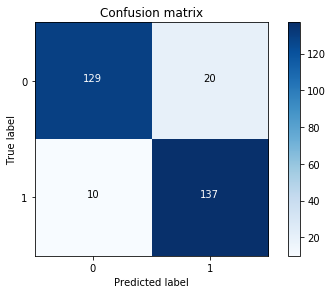

In [97]:
#使用下采样的数据做的logistic回归
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
#使用下采样划分出来的数据训练和检测可以看出精度还是挺高的

Recall metric in the testing dataset:  0.9183673469387755


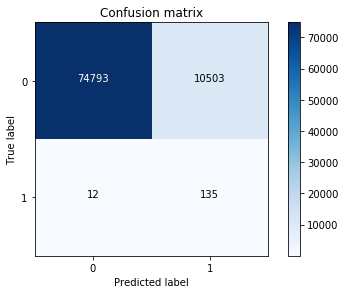

In [99]:
#使用下采样进行训练，再用正常数据进行验证
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

* 可以由上看出来，由于使用下采样，在这份数据中违约的人是少数，下采样使得数据正负样本比例和现实不符，使得更容易判定为负样本，所以在真实数据中常常把正样本判为负样本

In [100]:
#使用现实数据进行训练：可以看出来效果并不太好
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.4925373134328358
Iteration  2 : recall score =  0.6027397260273972
Iteration  3 : recall score =  0.6833333333333333
Iteration  4 : recall score =  0.5692307692307692
Iteration  5 : recall score =  0.45

Mean recall score  0.5595682284048672

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.5671641791044776
Iteration  2 : recall score =  0.6164383561643836
Iteration  3 : recall score =  0.6833333333333333
Iteration  4 : recall score =  0.5846153846153846
Iteration  5 : recall score =  0.525

Mean recall score  0.5953102506435158

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.5522388059701493
Iteration  2 : recall score =  0.6164383561643836
Iteration  3 : recall score

Recall metric in the testing dataset:  0.6190476190476191


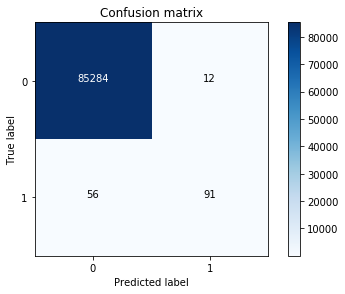

In [102]:
#使用现实数据训练和预测并画出混淆矩阵
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

* 由于显示数据中违约的人总是少的，所以完全使用原始数据进行训练则会倾向于认为都是不违约的，所以效果也不是太好

Recall metric in the testing dataset:  1.0 when threshold= 0.1
Recall metric in the testing dataset:  1.0 when threshold= 0.2
Recall metric in the testing dataset:  1.0 when threshold= 0.3
Recall metric in the testing dataset:  0.9727891156462585 when threshold= 0.4
Recall metric in the testing dataset:  0.9319727891156463 when threshold= 0.5
Recall metric in the testing dataset:  0.8707482993197279 when threshold= 0.6
Recall metric in the testing dataset:  0.8231292517006803 when threshold= 0.7
Recall metric in the testing dataset:  0.7551020408163265 when threshold= 0.8
Recall metric in the testing dataset:  0.5918367346938775 when threshold= 0.9


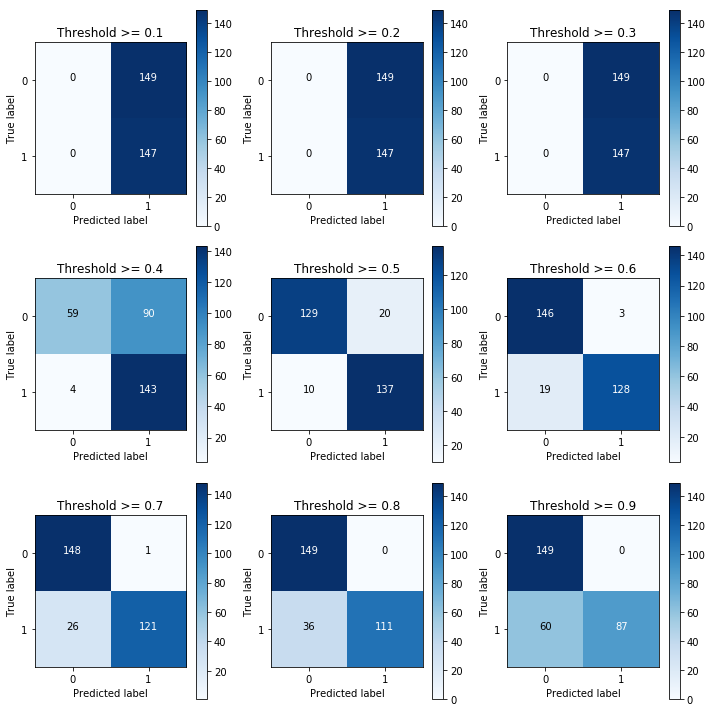

In [103]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)
#使用下采样的数据进行训练和验证，并改变认为是正例的概率阀
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]),"when threshold=",i)

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 
# 可以看出还是0.5最好

##  上采样（一样多）

In [104]:
import pandas as pd
from imblearn.over_sampling import SMOTE#针对不均衡的数据进行处理
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [105]:
credit_cards=pd.read_csv('./data/creditcard.csv')

columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

In [106]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [107]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [108]:
len(os_labels)

454908

In [109]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.9688392165541662
Iteration  4 : recall score =  0.957760411514492
Iteration  5 : recall score =  0.9584308811729921

Mean recall score  0.9340179863984149

-------------------------------------------
C parameter:  0.1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Iteration  3 : recall score =  0.970366271992918
Iteration  4 : recall score =  0.9598157857135006
Iteration  5 : recall score =  0.959683890042976

Mean recall score  0.9349850740999639

-------------------------------------------
C parameter:  1
-------------------------------------------

Iteration  1 : recall score =  0.8903225806451613
Iteration  2 : recall score =  0.8947368421052632
Ite

Recall metric in the testing dataset:  0.9108910891089109


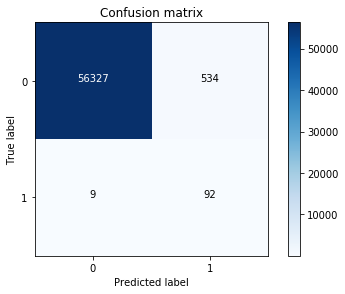

In [110]:
# 使用上采样的数据进行训练，然后使用现实数据进行验证
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()
#可以看出结果还是比较好的，用上采样数据放大了正样本（也就是违约的人）被找出来的概率，再用现实数据去验证结果就好多了。

## 在下采样、上采样中的小经验： 
3. 考虑对大类下的样本（超过1万、十万甚至更多）进行欠采样，即删除部分样本； 
4. 考虑对小类下的样本（不足1为甚至更少）进行过采样，即添加部分样本的副本； 
5. 考虑尝试随机采样与非随机采样两种采样方法； 
6. 考虑对各类别尝试不同的采样比例，不一定是1:1，有时候1:1反而不好，因为与现实情况相差甚远； 
7. 考虑同时使用过采样与欠采样，对二者进行结合；